In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import csv
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import *
from keras.layers import *
from keras.optimizers import Adam
%matplotlib inline

Using TensorFlow backend.
/Users/karan/.virtualenvs/dlearn/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [32]:
#data folder

log_path = os.getcwd() + '/data/driving_log.csv'
data_folder = os.getcwd() + '/'


#resized image dimension in training
img_rows = 16
img_cols = 32

#batch size and epoch
batch_size=256
nb_epoch=100

In [4]:
# readin log files

logs = []
with open(log_path,'rt') as f:
    reader = csv.reader(f)
    for line in reader:
        logs.append(line)
log_labels = logs.pop(0)

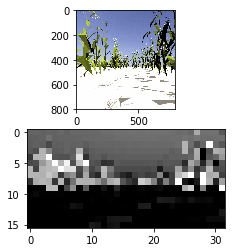

In [5]:
# image preprocessing, take only the S channel of HSV color space

img = plt.imread(data_folder + (logs[10][0]).strip())
img_processed = (cv2.cvtColor(cv2.resize(img,(32,16)), cv2.COLOR_RGB2HSV))[:,:,1]

plt.subplot(2,1,1)
plt.imshow(img)
plt.subplot(2,1,2)
plt.imshow(img_processed,cmap='gray')

In [6]:
def image_preprocessing(img):
    """preproccesing training data to keep only S channel in HSV color space, and resize to 16X32"""
    resized = cv2.resize((cv2.cvtColor(img, cv2.COLOR_RGB2HSV))[:,:,1],(img_cols,img_rows))
    return resized

In [20]:
def load_data(X,y,data_folder):
    log_path = data_folder + 'data/' + 'driving_log.csv'
    logs = []
    with open(log_path,'rt') as f:
        reader = csv.reader(f)
        for line in reader:
            logs.append(line)
        log_labels = logs.pop(0)
    
    for i in range(len(logs)):
        img_path = logs[i][0]
        img_path = data_folder+'/data/IMG'+(img_path.split('IMG')[1]).strip()
        img = plt.imread(img_path)
        X.append(image_preprocessing(img))
        y.append(float(logs[i][2]))

In [21]:
data={}
data['features'] = []
data['labels'] = []

load_data(data['features'], data['labels'],data_folder)

In [22]:
X_train = np.array(data['features']).astype('float32')
y_train = np.array(data['labels']).astype('float32')

In [23]:
X_train = np.append(X_train,X_train[:,:,::-1],axis=0)
y_train = np.append(y_train,-y_train,axis=0)

In [24]:
X_train, y_train = shuffle(X_train, y_train)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, test_size=0.1)

In [25]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

In [28]:
model = Sequential([
            Lambda(lambda x: x/127.5 - 1.,input_shape=(img_rows,img_cols,1)),
            Conv2D(2, 3, 3, border_mode='valid', input_shape=(img_rows,img_cols,1), activation='relu'),
            MaxPooling2D((4,4),(4,4),'valid'),
            Dropout(0.25),
            Flatten(),
            Dense(1)])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 16, 32, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 30, 2)         20        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 7, 2)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 7, 2)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 42)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 43        
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


/Users/karan/.virtualenvs/dlearn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(2, (3, 3), input_shape=(16, 32, 1..., activation="relu", padding="valid")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
model.compile(loss='mean_squared_error',optimizer=Adam(1e-5))
history = model.fit(X_train, y_train,batch_size=batch_size, nb_epoch=nb_epoch,verbose=1, validation_data=(X_val, y_val))

/Users/karan/.virtualenvs/dlearn/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 3843 samples, validate on 427 samples
Epoch 1/100
3843/3843 [==============================] - 0s 123us/step - loss: 0.4435 - val_loss: 0.4624
Epoch 2/100
3843/3843 [==============================] - 0s 56us/step - loss: 0.4434 - val_loss: 0.4624
Epoch 3/100
3843/3843 [==============================] - 0s 56us/step - loss: 0.4434 - val_loss: 0.4624
Epoch 4/100
3843/3843 [==============================] - 0s 56us/step - loss: 0.4434 - val_loss: 0.4623
Epoch 5/100
3843/3843 [==============================] - 0s 56us/step - loss: 0.4434 - val_loss: 0.4623
Epoch 6/100
3843/3843 [==============================] - 0s 56us/step - loss: 0.4434 - val_loss: 0.4623
Epoch 7/100
3843/3843 [==============================] - 0s 55us/step - loss: 0.4434 - val_loss: 0.4623
Epoch 8/100
3843/3843 [==============================] - 0s 56us/step - loss: 0.4434 - val_loss: 0.4623
Epoch 9/100
3843/3843 [==============================] - 0s 57us/step - loss: 0.4434 - val_loss: 0.4622
Epoch 10/100
384